### Team members

**Ole Jacob Mellgren, studentID: 563827**

**Hans Stemshaug**

**Peter Lundestad Lawrence**

### Kaggle Team Name

**[36] Gooseling hunters**

# EDA - Exploratory Data Analysis

Preparation is a crucial part of solving tasks and challenges using machine learning. To be able to make the best possible machine learning model we need to understand the field we are working in. As we are no experts in the area of energy production from solar panel, we must do some research in this field. By doing this, we will be able to better understand the data and therefore make a better model for the prediction task. 

The main part of the preparation is the exploratory data analysis (EDA). This analysis consists of research about the domain, checking data intuitivity, understanding the data and exploring individual or groups of features. By doing such an analysis we will be able to generate hypothesizes about the data and discover important insights. For example, we might be able to figure out which features in the dataset that could be ignored, and which ones should be emphasized. This will also prepare us for the feature engineering we must do at a later occasion.

## Solar panels and energy production

There are many factors that affect solar panels and their energy production. In our research about the field we are going to focus at the major factors that can make an impact. Later we are going to focus on more specific features in our dataset. Both reflecting around what we know about the subject, and researching for new information, will be valuable in the early stages of the process. 

#### Temperature

If we imagine the best possible weather for solar panels, we probably think of a day with clear sky, shining sun and high temperatures. However, research show that the best temperatures for solar panels is 77 degrees fahrenheit (25°C) (Akshay, 2022). This article also states that temperature is one of the most important factors that affect energy production by solar panels, which could be useful to remember. 

Another article refers to statistics when stating that temperatures above 77 fahrenheit actually can decrease the performance of the solar panels. In general, a solar panel will become one percent less efficient for each degree in fahrenheit above 77 °F (Wolf, n.d.). So depending on where in the world the solar panels are going to be utilized, it might vary whether they are more effective in the winter or summer.

#### Clouds and fog

The affect clouds have on the energy production of the solar panels are pretty stragihtforward. Anything the comes inbetween the sun and the solar panels, reduces the production of energy. But the solar panels can still produce energy when there are clouds, depending on the cloud coverage (Wolf, n.d.). Fog will also have the same effect, and anything that can cast a shadow over the panels like trees, buildings or other obstacles will reduce production. In our case, such details will be ignored as they are not relevant to our task.

#### Precipitation

Precipitation is any type of water vapor that falls from the clouds. In our research we have focused on the two major ones, rain and snow. The rain in itself will actually not have any impact on the production of the panels. Rain can actually help the production of energy by cleaning the solar panels for dust and dirt. (Wolf, n.d.) However, when there is rain, there are often clouds, and therefore we might be able to see a correlation between energy production and rain as well. 

Snow can have a very different affect than rain. Snow will cover the solar panels and in this way totally prevent production of energy. Solar panels are however often tilted so that snow could slide off easier. The solar panels might also be cleared for snow by people when there has been accumulated a lot of snow, but this is not something we can assume will happen. Just like with the rain, there will be clouds when we have snow, and we can assume that snow will have an impact on the production. As mentioned, they will also have an impact when it is not snowing and there are no clouds, by covering the panels.


##### Sources: 
Akshay, VR. (2022) *What's the optimal temperature for solar panels*, From URL: https://www.arka360.com/ros/optimal-temperature-solar-panels/

Wolf, S. (n.d.) *How does weather affect solar panels*, From URL: https://www.paradisesolarenergy.com/blog/how-does-weather-affect-solar-panels


## Reading data to use for plotting

In [ ]:
"""
This script has functionality for reading .parquet files as a pandas DataFrame
Date: 10/10/2023
Auth: Peter
"""
import pandas as pd
from typing import List
import os

folder = '../../data/'
A = folder + 'A/'
B = folder + 'B/'
C = folder + 'C/'

XTRO = 'X_train_observed.parquet'
XTRE = 'X_train_estimated.parquet'
XTEE = 'X_test_estimated.parquet'
Y = 'train_targets.parquet'

relative_filepaths = {"A": A, "B": B, "C": C}

def get_df_from_parquet(filepath: str) -> pd.DataFrame:
    """
    Returns DataFrame when given filepath to .parquet file
    """
    return pd.read_parquet(filepath)

def merge_x(xo_path, xe_path):
    xo = get_df_from_parquet(xo_path)
    xe = get_df_from_parquet(xe_path)
    if 'date_calc' in xe.columns:
         xe.drop(columns=['date_calc'], inplace=True)
    x_train = pd.concat([xo, xe])
    return x_train

def append_x_y(x_list, y_list, merge, path):
    if merge:
        x_list.append(merge_x(path+XTRO, path+XTRE))
    else: 
        x_list.append(get_df_from_parquet(path+XTRO)) #appending observed X train
        x_list.append(get_df_from_parquet(path+XTRE)) #appendeing estimated X train
    y_list.append(get_df_from_parquet(path+Y)) # appending target Y

def get_training_data(location: str or list = None, merge: bool = True) -> List[List[pd.DataFrame]]:
    """
    Returns tuple with merged x_train data for given location(s) in a list and corresponding list of targets

    OR if none given, returns all locations x_train_merged per location 
    
    **in order A, B, C <----------NB!** or order given. 

    RETURNS: List[List[x_train: pd.DataFrame], List[y_target: pd.DataFrame]]

    NOTE: If merge = False the list returned is [x_train_observed_A, x_train_estimated_A,...]
    """
    ### dealing with current working directory for relative paths ###
    cwd_old = os.getcwd()
    file_loc = os.path.abspath(__file__)
    cwd_new = os.path.dirname(file_loc)
    os.chdir(cwd_new)
    
    x_train_list = []
    y_target_list = []
    
    if location == None: 
        for i in relative_filepaths:
            path = relative_filepaths[i]
            append_x_y(x_train_list, y_target_list, merge, path)
    
    elif type(location) == str:
        try:
            path = relative_filepaths[location] 
            append_x_y(x_train_list, y_target_list, merge, path)
        except Exception as e:
            print(f'\nProbaly no matching location for passed string: {location}')
            raise Exception(e)
        
    
    elif type(location) == list:
        for loc in location: 
            try: 
                path = relative_filepaths[loc]
                append_x_y(x_train_list, y_target_list, merge, path)
            except Exception as e:
                print(f'\nProbaly no matching location for passed strings:{location}')
                raise Exception(e)
    
    os.chdir(cwd_old)
    ### returning working directory ###
    return [x_train_list, y_target_list]

def get_test_data(location: str or list = None) -> List[pd.DataFrame]:
    """
    Returns list with x_test data for given location(s) in a list

    OR if none given, returns all locations x_testper location 
    
    **in order A, B, C <----------NB!** or order given. 

    RETURNS: List[x_test: pd.DataFrame]
    """
    ### dealing with current working directory for relative paths ###
    cwd_old = os.getcwd()
    file_loc = os.path.abspath(__file__)
    cwd_new = os.path.dirname(file_loc)
    os.chdir(cwd_new)
    
    x_list = []
    
    if location == None: 
        for i in relative_filepaths:
            path = relative_filepaths[i]
            xt = get_df_from_parquet(path+XTEE)
            x_list.append(xt)
    
    elif type(location) == str:
        try:
            path = relative_filepaths[location] 
            x_list.append(get_df_from_parquet(path+XTEE))
        except Exception as e:
            print(f'\nProbaly no matching location for passed string: {location}')
            raise Exception(e)
        
    
    elif type(location) == list:
        for loc in location: 
            try: 
                path = relative_filepaths[loc]
                x_list.append(get_df_from_parquet(path+XTEE))
            except Exception as e:
                print(f'\nProbaly no matching location for passed strings:{location}')
                raise Exception(e)
    
    os.chdir(cwd_old)
    for x in x_list:
        if 'date_calc' in x:
            x.drop(columns=['date_calc'], inplace=True)
    ### returning working directory ###
    return x_list

dataframes = get_training_data()
X_frames_train = dataframes[0]
Y_frames_train = dataframes[1]
X_frames_test = get_test_data()

XTRA = X_frames_train[0]
XTRB = X_frames_train[1]
XTRC = X_frames_train[2]

YA = Y_frames_train[0]
YB = Y_frames_train[1]
YC = Y_frames_train[2]

X_train = [XTRA, XTRB, XTRC]
Y_train = [YA, YB, YC]

This combines observed and estimated dataframes for all locations.

## Data intuitivity

Data seems intuitive at first sight, however we will see some features are of less value and some contains NaN values which can cause trouble for some models.

If we compare the x-data and y-data we observe that the x-data has measurements every 15 minutes, while the y-data has every hour. When we are going to train our model we need the same amount of columns for x-data and y-data. Our first idea was to take the mean of all x-data in an hour to be able to downscale x-data and have the same amount of columns for x and y.

To visualize our data we have used Grafana. This is a tool specialized in presenting large datasets with graphs and diagrams. This made it easier for us to explore individual features. In the beginning we mainly used matplotlib to plot our data. We then discovered some irregularities in the y-data, which had several intervals with constant values. This did not seem that intuitive, and we knew this had to be handled. 

We also observed that dataset C had a lot of NaN values in the beginning. These values need to be dropped as it gives no value for the training of our models.

In [ ]:
import matplotlib.pylab as plt
fig, axs = plt.subplots(6, 1, figsize=(20, 10), sharex=True)
YA[['time', 'pv_measurement']].set_index('time').plot(ax=axs[0], title='Target A', color='red')
YB[['time', 'pv_measurement']].set_index('time').plot(ax=axs[1], title='Target B', color='red')
YC[['time', 'pv_measurement']].set_index('time').plot(ax=axs[2], title='Target C', color='red')

We observe that especially dataset B has many intervals with constant values. This can cause errors for our model in we train using these values, and they should therefore be removed.

## Individual features

### Time seasonality `date_forecast`

The `date_forecast` value in itself does not give us a lot of information as it is only a linear value (Increasing time and date). While the real world time moves in seasons and in our case we are interested in the two periods throughout the day and also throughout the year. We can use sine and / or cosine in order to induce seasonality into our dataset for the time attribute. This however introduces an extra issue.

In [ ]:
import numpy as np

date_time = X_train[0]['date_forecast']
unix_time = (date_time - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

day = 24*60*60
year = (365.2425)*day

def sinus_day(unix_time):
    return np.sin(unix_time * (2 * np.pi / day)) # since it is seconds since 1.1.1970 we divide by seconds in a day to get seasonal changes throughout the dat

def sinus_year(unix_time):
    return np.sin(unix_time * (2 * np.pi / year))

def cosinus_day(unix_time):
    return np.cos(unix_time * (2 * np.pi / day))

def cosinus_year(unix_time):
    return np.cos(unix_time * (2 * np.pi / year))

# sinus
sinus_day_time = unix_time.apply(sinus_day)
sinus_day_time = sinus_day_time.rename('sinus_day')
sinus_year_time = unix_time.apply(sinus_year)
sinus_year_time = sinus_year_time.rename('sinus_year')

# cosinus
cosinus_day_time = unix_time.apply(cosinus_day)
cosinus_day_time = cosinus_day_time.rename('cosine_day')
cosinus_year_time = unix_time.apply(cosinus_year)
cosinus_year_time = cosinus_year_time.rename('cosinus_year')

week_datetime = date_time[0:48*4]
week = sinus_day_time[0:48*4] #168 = hours through a week, datapoints every 15 minutes
week_frame = pd.merge(week_datetime, week, left_index=True, right_index=True)
week_frame['cosine_day'] = cosinus_day_time[0:48*4]

year_sin = sinus_year_time[0:24*4*365] #datapoints every 15 minutes
year_cos = cosinus_year_time[0:24*4*365]
year_datetime = date_time[0:24*4*365]
year_frame = pd.merge(year_datetime, year_sin, left_index=True, right_index=True)
year_frame['cosine_year'] = year_cos[0:24*4*365]

fig, axs = plt.subplots(1, 1, figsize=(20,6), sharex=True)
year_frame.plot(x='date_forecast', y='sinus_year', kind='line', ax=axs, color='red')
year_frame.plot(x='date_forecast', y='cosine_year', kind='line', ax=axs, color='blue')

fig2, axx = plt.subplots(1, 1, figsize=(20,6), sharex=True)
week_frame.plot(x='date_forecast', y='sinus_day', kind='line', ax = axx, color='red')
week_frame.plot(x='date_forecast', y='cosine_day', kind='line', ax = axx, color='blue')

### Issues with only sinus or cosinus as seasonal transformation function
Looking at the plots above we can see that only looking at sinus (red line) gives us seasonality at first glance but it oscilates such that July and January gets the same value. In fact we get to values that are the same at any y value that is between `(1, -1)`. And as we move towards 0 the intuitive error of the two corresponding x-axes to be the same increases. As in the example of july and january above.

To solve this we introduce another seasonal funciton of cosine such that every x has a unique tuple value `(sin(x), cos(x))`. Now we have a way of representing time as a seasonal vairable both for yearly variations and daily variations. This is probably the most important metric we can get from the time dimension since weather and sunlight is an important part of powerproduction. Weekly and monthly aspects are not that interesting since a 7-day cycle or 30-day cycle shouldn't have anything to say on the production of solar power. However, daily and yearly makes sense since the sunlight changes through the day every day, and the distance between earth and sun vary yearly.

### Negative values in prediction

Some prediction-models does not like negative or 0 values when fitting a model. Thus a quick fix for the seasonality is to add 2 in the conversion functions to sinus and cosine

## NULL values in the dataset

The dataset provided has some null values for certain columns. Many prediction models does not work well with `NULL` in the dataset. Therefore we might need to fill or remove these values. 

To get some statistics about which columns has the most `NULL` values, we can do the following: 

In [ ]:
# Show null values for all training sets

count_a = X_train[0].isna().sum()
count_b = X_train[1].isna().sum()
count_c = X_train[2].isna().sum()

count_a.rename("A", inplace=True)
count_b.rename("B", inplace=True)
count_c.rename("C", inplace=True)

df = pd.merge(count_a, count_b, left_index=True, right_index=True)
df = pd.merge(df, count_c, left_index=True, right_index=True)

df[(df['A'] != 0) | (df['B'] != 0) | (df['C'] != 0)]

The example above is only for location A and the observed x_values.

Since it is very few columns, one quick fix would be to simply drop these. 

Another solution is to induce a value into the `NULL` rows either based on previous and following values, or simply just set a chosen value. For *snow density* there might be the case that a fixed value for the `NULL` is the best option. Maybe a number like -1 since the it seems like the `NULL` comes when there is no snow to measure the density on.

## Binary, categorical and constant values

### Boolean values: 
- `is_day:idx` -> 0/1
- `is_in_shadow:idx` -> 0/1

### Categorical values:
- `dew_or_rime` -> (dew=1, rime=-1, neither=0)
- `precip_type_5min:idx` -> precipitation type during the previous time period (5min)

### Constant values:
- `elevation` -> The elevation of the solar_panel above ground. This is a static value. When we train per location this does not make sense for us to use. Therefore it can be dropped

In [ ]:
df['precip_type_5min:idx'].unique()

In [ ]:
df['dew_or_rime:idx'].unique()

## Group of features

To explore groups of features, we thought it could be useful to use a tool that analyses correlation between different features. To do this we used an import from dataprep.eda to create a report with useful information.

```
from dataprep.eda import create_report
report = create_report(X_train[0])
report
```

This analyzes the features of training set A and prints a report. As the features are the same for all locations, we assume that it does not matter what location we create the report for when trying to observe correlations.

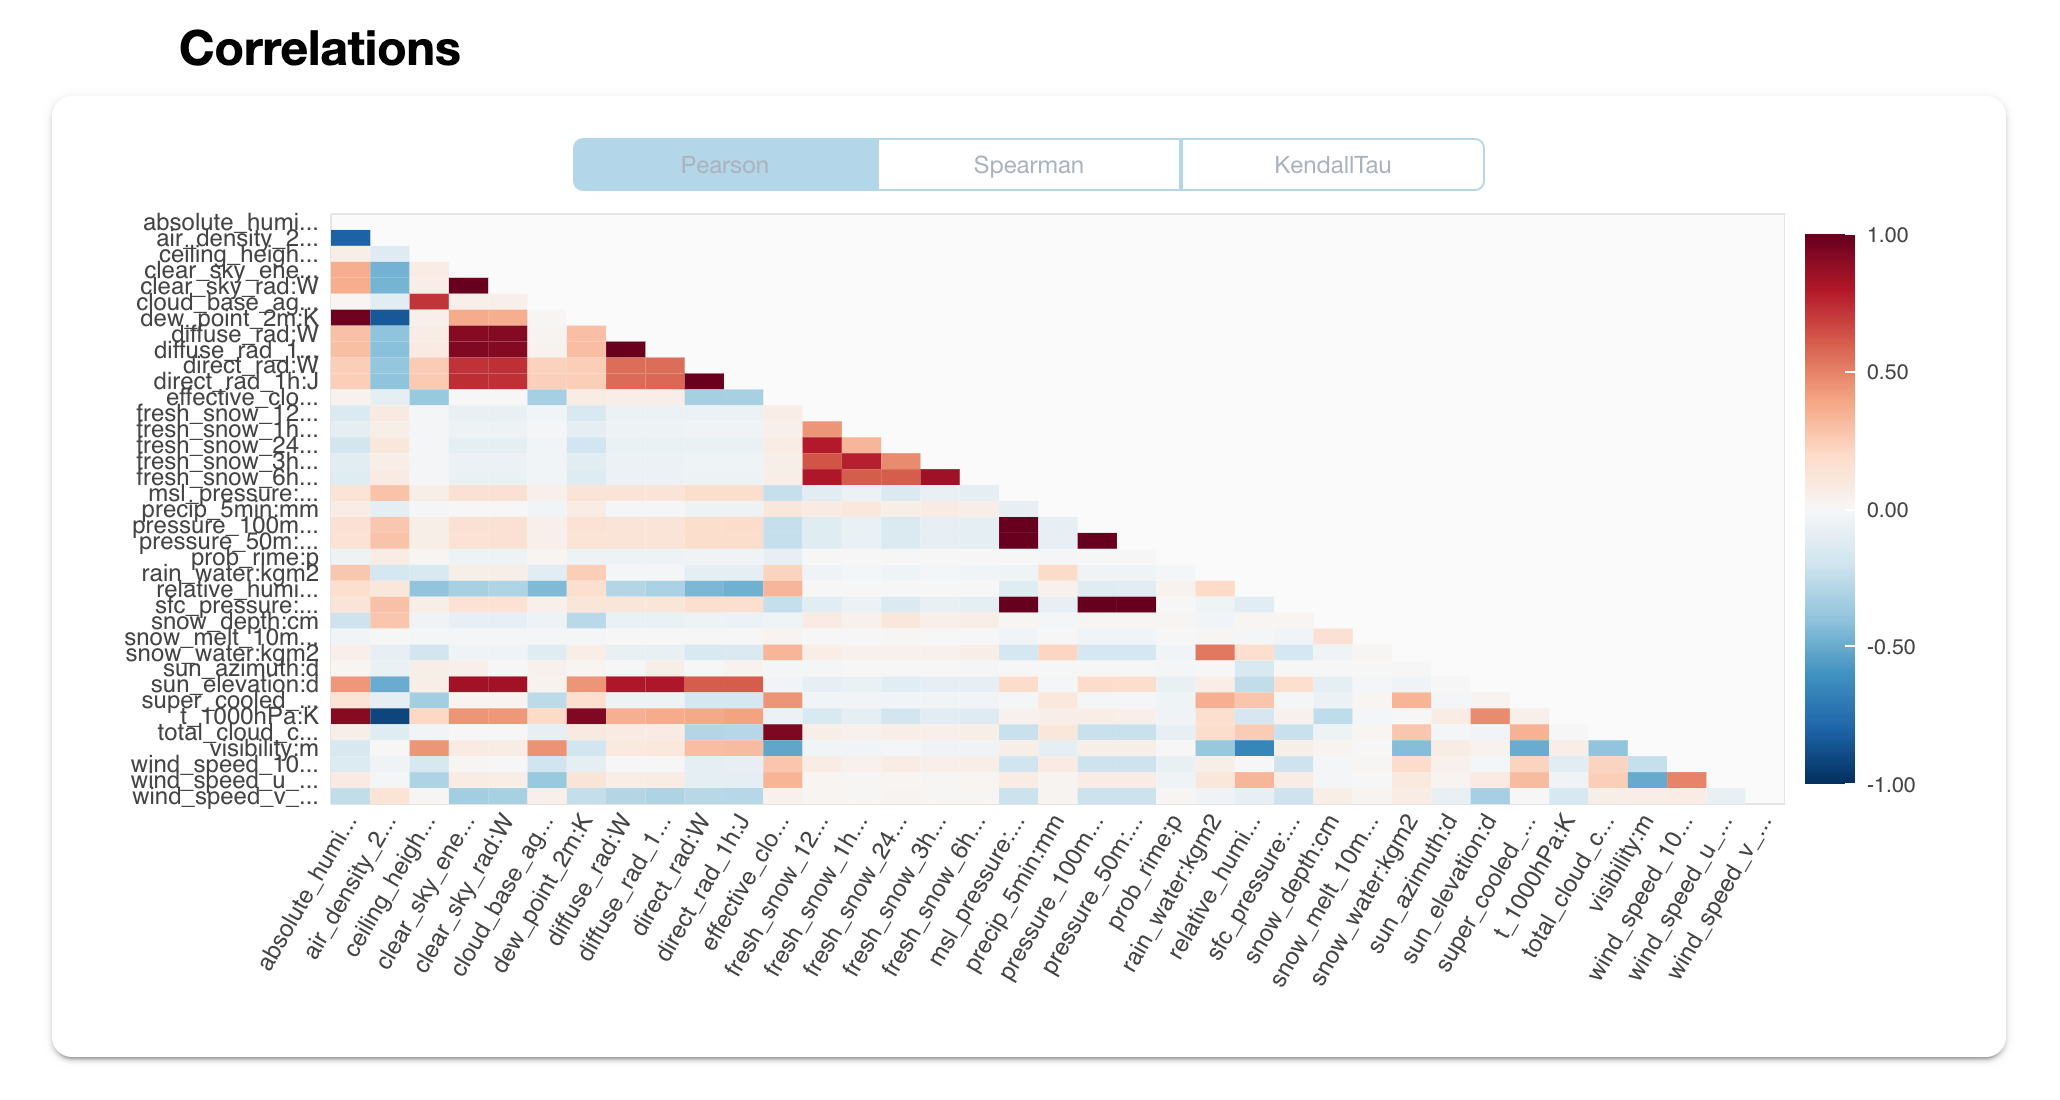

#### Pressure: `msl_pressure:hPa`, `pressure_100m:hPa`, `pressure_50m:hPa`, `sfc_pressure:hPa`

We observe a strong correlation between all the features about pressure. It could therefore be useful to combine them into one column by for example using mean.

#### Radiation: `diffuse_rad:W`, `direct_rad:W`, `diffuse_rad_1h:J`, `direct_rad_1h:J`

All these features have a strong correlations between each other. Combining the features of the same unit could give more information about the radiation. Two new features could therefore be made where one of them is the mean of `diffuse_rad:W` and `direct_rad:W` and the other one the mean of `diffuse_rad_1h:J`, `direct_rad_1h:J`.


#### Snow: `snow_density`, `snow_depth`, `snow_drift`, `snow_melt_10min` and `snow_water`

These attributes are interesting when there is snow, however when there is no snow, the rate at which it melts does not matter in terms of solar production (since ther is no snow). 

Thus a state where `snow_melt_10min` = `0` can be very bad when there is snow, and totally irrelevant when there is none. 


# Models and feature engineering

## Linear regression, HistGradientBoosting and Random Forrest

As mentioned earlier we need to downscale x so that we have the same amount of columns for x and y. This was the first problem we tried to solve. In the beginning we agreed to use simple models to test if the data aggregation and cleaning worked and produced an accepted prediction. We also align with the x-data and y-data by merging on `time` and `date_forecast` columns.

At this stage we did not have the reading of the data that was used in at the top of this notebook to plot. We had a much simpler reading where we directly read all data and did not concatenate observed and estimated until the aggregation.

In [ ]:
X_train_estimated_a = pd.read_parquet('../data/A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('../data/B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('../data/C/X_train_estimated.parquet')

X_train_observed_a = pd.read_parquet('../data/A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('../data/B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('../data/C/X_train_observed.parquet')

X_test_estimated_a = pd.read_parquet('../data/A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('../data/B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('../data/C/X_test_estimated.parquet')

train_targets_a = pd.read_parquet('../data/A/train_targets.parquet')
train_targets_b = pd.read_parquet('../data/B/train_targets.parquet')
train_targets_c = pd.read_parquet('../data/C/train_targets.parquet')

### Data aggregation

In [ ]:
"""
Clean up data set A, B and C
"""

def data_aggregation(x_train_est, x_train_observe, y_train):

  if 'date_calc' in x_train_est.columns:
    x_train_est.drop(columns="date_calc", inplace=True)

  x_train = pd.concat([x_train_observe, x_train_est])

  # Group the rows into blocks of 4 and apply the aggregation function
  agg_func = {col: 'mean' for col in x_train.columns[1:]}
  X_train_downscaled = x_train.groupby(x_train.index // 4).agg({**{'date_forecast': 'first'}, **agg_func})

  y_train.dropna(inplace=True)
  combined_data = pd.merge(X_train_downscaled, y_train, left_on='date_forecast', right_on='time')
  y_train = combined_data['pv_measurement']

  if 'date_forecast' and 'time' and 'pv_measurement' in combined_data.columns:
    combined_data.drop(columns="date_forecast", inplace=True)
    combined_data.drop(columns="time", inplace=True)
    combined_data.drop(columns="pv_measurement", inplace=True)

  return combined_data, y_train

x_train_a, y_train_a = data_aggregation(X_train_estimated_a, X_train_observed_a, train_targets_a)
x_train_b, y_train_b = data_aggregation(X_train_estimated_b, X_train_observed_b, train_targets_b)
x_train_c, y_train_c = data_aggregation(X_train_estimated_c, X_train_observed_c, train_targets_c)


def data_aggregation_test(x_test_est):

  # Group the rows into blocks of 4 and apply the aggregation function
  agg_func = {col: 'mean' for col in x_test_est.columns[1:]}
  X_test_downscaled = x_test_est.groupby(x_test_est.index // 4).agg({**{'date_forecast': 'first'}, **agg_func})

  if 'date_forecast' in X_test_downscaled.columns:
    X_test_downscaled.drop(columns="date_forecast", inplace=True)

  return X_test_downscaled


X_test_estimated_a = data_aggregation_test(X_test_estimated_a)
X_test_estimated_b = data_aggregation_test(X_test_estimated_b)
X_test_estimated_c = data_aggregation_test(X_test_estimated_c)

### Feature engineering

For these models we performed we little feature engineering. We decied to drop the features that contained NaN values as this caused problems for Random Forrest and Linear Regression:

In [ ]:
x_train_a = x_train_a.drop(columns=['ceiling_height_agl:m', 'cloud_base_agl:m', 'snow_density:kgm3'], inplace=True)
x_train_b = x_train_b.drop(columns=['ceiling_height_agl:m', 'cloud_base_agl:m', 'snow_density:kgm3'], inplace=True)
x_train_c = x_train_c.drop(columns=['ceiling_height_agl:m', 'cloud_base_agl:m', 'snow_density:kgm3'], inplace=True)

X_test_estimated_a = X_test_estimated_a.drop(columns=['ceiling_height_agl:m', 'cloud_base_agl:m', 'snow_density:kgm3'], inplace=True)
X_test_estimated_b = X_test_estimated_b.drop(columns=['ceiling_height_agl:m', 'cloud_base_agl:m', 'snow_density:kgm3'], inplace=True)
X_test_estimated_c = X_test_estimated_c.drop(columns=['ceiling_height_agl:m', 'cloud_base_agl:m', 'snow_density:kgm3'], inplace=True)

### Validation

From early on, we decided to setup our models with some type of validation so that we could test our models locally and not only using kaggle submissions. To achieve this we used train_test_split that splits a dataset into a training set and a test set so we can validate the prediction we get from predicting the testing set towards the actual values. We used MSE (mean squared error) to get a measurement of the error and made modifications to see if this improved our validation score. We also used the method score(), which is a method many models have that calculates a score of the model.

In [ ]:
x_train_a, x_val_a, y_train_a, y_val_a = train_test_split(x_train_a, y_train_a, test_size=0.17, random_state=42)
x_train_b, x_val_b, y_train_b, y_val_b = train_test_split(x_train_b, y_train_b, test_size=0.17, random_state=42)
x_train_c, x_val_c, y_train_c, y_val_c = train_test_split(x_train_c, y_train_c, test_size=0.17, random_state=42)

model_a = LinearRegression()
model_b = LinearRegression()
model_c = LinearRegression()

model_a.fit(x_train_a, y_train_a)
model_b.fit(x_train_b, y_train_b)
model_c.fit(x_train_c, y_train_c)

In [ ]:
# Evaluate the model based on the validation data

mse_a = mean_squared_error(y_val_a, model_a.predict(x_val_a))
print("MSE for A: ", mse_a)
mse_b = mean_squared_error(y_val_b, model_b.predict(x_val_b))
print("MSE for B: ", mse_b)
mse_c = mean_squared_error(y_val_c, model_c.predict(x_val_c))
print("MSE for C: ", mse_c)
print("Mean MSE: ", (mse_a + mse_b + mse_c) / 3)

# Evaluate the predictions

score_a = model_a.score(x_val_a, y_val_a)
score_b = model_b.score(x_val_b, y_val_b)
score_c = model_c.score(x_val_c, y_val_c)

print("Score A: ", score_a)
print("Score B: ", score_b)
print("Score C: ", score_c)

## H2O Gradient Boosting

After using these models, we tried moving on to some more advanced models. H2O is an AutoML models that automates machine learning. This models can automate preprocessing and some feature engineering. For this model we used the same aggregation as before, with no feature engineering as we assume H2O automates some of this for us. H2O tests several models and finds the best one.

In [ ]:
# Data set A, B and C to H2O

def data_to_h2o(x_train, y_train, x_test):
  
    x_train_h2o = h2o.H2OFrame(x_train)
    y_train = y_train.to_frame()
    y_train_h2o = h2o.H2OFrame(y_train)
    x_test_h2o = h2o.H2OFrame(x_test)
  
    return x_train_h2o, y_train_h2o, x_test_h2o

x_train_a_h2o, y_train_a_h2o, x_test_a_h2o = data_to_h2o(x_train_a, y_train_a, X_test_estimated_a)
x_train_b_h2o, y_train_b_h2o, x_test_b_h2o = data_to_h2o(x_train_b, y_train_b, X_test_estimated_b)
x_train_c_h2o, y_train_c_h2o, x_test_c_h2o = data_to_h2o(x_train_c, y_train_c, X_test_estimated_c)
y_train_a_h2o.head()

# Training the models

print(y_train_a_h2o)
aml_a = H2OAutoML(max_models=10, seed=1, max_runtime_secs=3600)
aml_b = H2OAutoML(max_models=10, seed=1, max_runtime_secs=3600)
aml_c = H2OAutoML(max_models=10, seed=1, max_runtime_secs=3600)

aml_a.train(x=x_train_a_h2o.columns, y=y_train_a_h2o.columns[0], training_frame=x_train_a_h2o)
aml_b.train(x=x_train_b_h2o.columns, y=y_train_b_h2o.columns[0], training_frame=x_train_b_h2o)
aml_c.train(x=x_train_c_h2o.columns, y=y_train_c_h2o.columns[0], training_frame=x_train_c_h2o)


H2O also provided a leaderboard of the models so we can see which models performs the best.

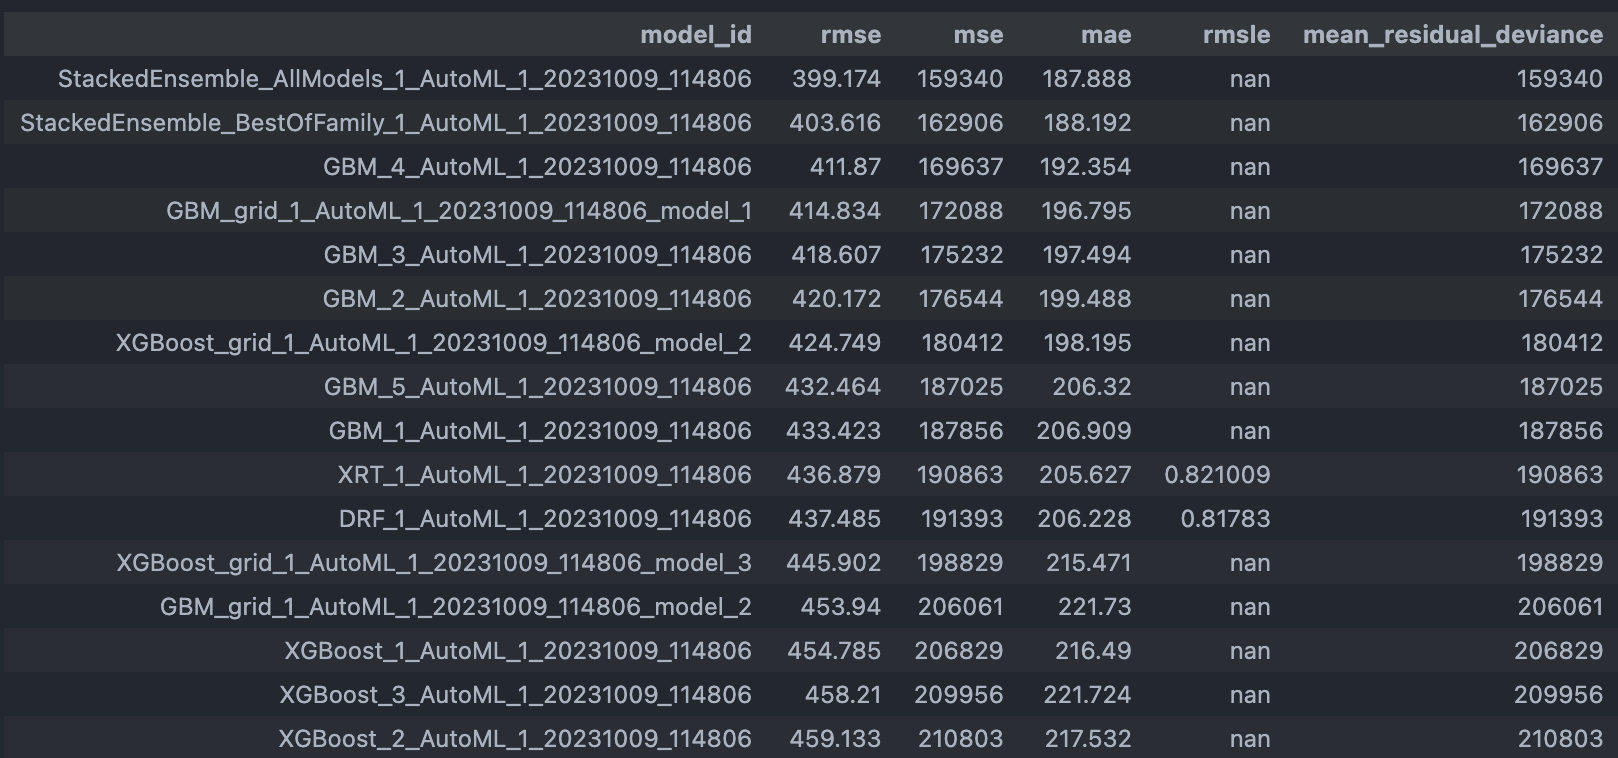

Even though this model produced an OK score on kaggle, we figured we had to expand our feature engineering and test other models.

## Data aggregation updated

As mentioned earlier, we aggregated the x data by taking the mean of the 4 data rows for one hour. Later, we realised that this could be problematic for the categorical columns, as taking the mean of categorical values could lead to a non-categorical value. Therefore, we decided to use a seperate aggregation function for all the categorial columns. This is called stocastic_median, which takes the median and rounds it to a integer to avoid float value.

In [ ]:
def stocastic_median(x_list):
    s = np.median(x_list)
    return int(s)


def gen_agg(df: pd.DataFrame, agg_type, batch_size: int = 4, merge_on = 'first') -> pd.DataFrame:
    """
    Pass dataframe WITH date_forecast value and choose aggregation type by passing string to 'agg_type'
    """
    agg_func = {col: agg_type for col in df.columns[1:]} # [1:] assumes 'date_forecast' is first
    return df.groupby(df.index // batch_size).agg({**{'date_forecast': merge_on}, **agg_func})


Our updated aggregation function was now:

In [ ]:
categorical_col = ['dew_or_rime:idx', 'precip_type_5min:idx', 'is_day:idx', 'is_in_shadow:idx']

def aggregate_correct_x(x: pd.DataFrame) -> pd.DataFrame:
   '''
   Takes a given dataframe and returns an aggregated dataframe based on selected categorical functions. 
   Assumes grouping of 4.
   '''
   categorical = x[["date_forecast"] + categorical_col]
   mean = x.drop(columns=categorical_col)

   categorical = gen_agg(categorical, agg_type=stocastic_median, merge_on = 'first')
   mean = gen_agg(mean, "mean", merge_on = 'first')

   return pd.merge(categorical, mean, on="date_forecast")

To align the x-data with the y-data we update our function to use the new aggregation of x.

In [ ]:
def data_allign(x_train, y_train):

  y_train.dropna(inplace=True)
  x_train = aggregate_correct_x(x_train)
  combined_data = pd.merge(x_train, y_train, left_on='date_forecast', right_on='time')
  y_train = combined_data['pv_measurement']

  if 'time' and 'pv_measurement' in combined_data.columns:
    combined_data.drop(columns=['time', 'pv_measurement'], inplace=True)
    
  return combined_data, y_train



X_train = [XTRA, XTRB, XTRC]
Y_train = [YA, YB, YC]

for i in range(len(X_train)):
    X_train[i], Y_train[i] = data_allign(X_train[i], Y_train[i])

for j in range(len(X_frames_test)):
    X_frames_test[j] = aggregate_correct_x(X_frames_test[j])

## Feature engineering updates

### Time-seasonality

Our first major feature engineering was adding columns for time-seasonality by combining sine and cosine. This feature was explained in detail in our data analysis of `date_forecast`, and has been a feature that has helped us greatly.

In [ ]:
import pandas as pd
import numpy as np
from typing import List

## We now need functions for assigning daily and YEARly cycles (described in datanalysis docu on Peter branch)
# plus 2 avoids 0 and negative values but we ignore this here since it allready normalises the data
DAY = 24*60*60
YEAR = (365.2425)*DAY
SHIFT = 0 #possible to shift oscilation to avoid 0 and or negative values.

# Conversion datetime -> unix_time
def get_unixtime(datetime: pd.Series) -> pd.Series:
    unixtime = (datetime - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
    return unixtime

# functions for creating seasonality:
def sinus_day(unix_time):
    return SHIFT + np.sin(unix_time * (2 * np.pi / DAY)) # since it is seconds since 1.1.1970 we divide by seconds in a DAY to get seasonal changes throughout the dat

def sinus_year(unix_time):
    return SHIFT + np.sin(unix_time * (2 * np.pi / YEAR))

def cosinus_day(unix_time):
    return SHIFT + np.cos(unix_time * (2 * np.pi / DAY))

def cosinus_year(unix_time):
    return SHIFT + np.cos(unix_time * (2 * np.pi / YEAR))

# function for returning two series with the daily cycles (sine and cosine)
def get_daycycle(unixtime: pd.Series) -> List[pd.Series]:
    sinus_daytime = unixtime.apply(sinus_day)
    sinus_daytime = sinus_daytime.rename('sinus_day') 
    cosinus_daytime = unixtime.apply(cosinus_day)
    cosinus_daytime = cosinus_daytime.rename('cosinus_day')
    return [sinus_daytime, cosinus_daytime]

# Function for returning two series with the yearly cycles
def get_yearcycle(unixtime: pd.Series) -> List[pd.Series]:
    sinus_yeartime = unixtime.apply(sinus_year)
    sinus_yeartime = sinus_yeartime.rename('sinus_year')
    cosinus_yeartime = unixtime.apply(cosinus_year)
    cosinus_yeartime = cosinus_yeartime.rename('cosinus_year')
    return [sinus_yeartime, cosinus_yeartime]

def append_seasonal_columns(df: pd.DataFrame, time_column: str = 'date_forecast') -> pd.DataFrame:
    """
    returns joined Dataframe with seasonal data. Does not drop time_column
    """
    # check that time column exists
    if time_column not in df.columns: 
        raise Exception(f"The timecolumn passed: {time_column}, is not part of the dataset passed.")
    
    if not np.issubdtype(df[time_column], np.datetime64):
        raise Exception(f'Passed timecolumn must be of numpy datetime64. Passed type is {df[time_column].dtype()}')
    
    unixtime = get_unixtime(df[time_column])
    day_sin, day_cos = get_daycycle(unixtime)
    year_sin, year_cos = get_yearcycle(unixtime)
    df = df.join([day_sin, day_cos, year_sin, year_cos])
    
    return df

In [ ]:
for i in range(len(X_train)):
    X_train[i] = append_seasonal_columns(X_train[i])

for i in range(len(X_frames_test)):
    X_frames_test[i] = append_seasonal_columns(X_frames_test[i])
 


## XGBoost

Our next focus was using different gradient boosting models. XGBoost is one of those. With the use of all the preprocessing and feature engineering above, we also implemented one hot encoding when starting to use XGBoost. One hot encoding involves dividing categorical columns with more that two unique values into several columns. Some models are better at handling only binary values instead of many categorical values. Therefore we tried using one hot encoding on the columns `dew_or_rime:idx`, `precip_type_5min:idx` which both have more than two unique values.

In [ ]:
def one_hot_encode(df: pd.DataFrame, col_list: [str]):
  for col in col_list:
    column_to_encode = df[col]
    df_encoded = pd.get_dummies(column_to_encode, prefix=col) # Convert categorical variable into dummy/indicator variables
    df.drop(col, axis=1, inplace=True)
    df_encoded_binary = df_encoded.astype(int) # Convert to binary from boolean
    df = pd.concat([df, df_encoded_binary], axis=1) # Concatenate dataframes
  return df

def fix_categorical(train: pd.DataFrame, test: pd.DataFrame):
     temp = pd.concat([train, test], ignore_index=True)
     index_train = temp[(temp['date_forecast'] < test['date_forecast'].iloc[0])].index
     return temp.drop(index_train)

OH_columns = ['dew_or_rime:idx', 'precip_type_5min:idx']

for i in range(len(X_frames_test)):
     X_train[i] = one_hot_encode(X_train[i],OH_columns)
     X_frames_test[i] = one_hot_encode(X_frames_test[i], OH_columns)
     X_frames_test[i] = fix_categorical(X_train[i], X_frames_test[i])

A big focus with the gradient boosting models was to optimize the hyperparameters. We used optuna to optimize these parameters.

In [ ]:
import optuna
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Split the data into training and validation sets
x_train_a, x_val_a, y_train_a, y_val_a = train_test_split(X_frames_train[0], Y_frames_train[0], test_size=0.17, random_state=42)
x_train_b, x_val_b, y_train_b, y_val_b = train_test_split(X_frames_train[1], Y_frames_train[1], test_size=0.17, random_state=42)
x_train_c, x_val_c, y_train_c, y_val_c = train_test_split(X_frames_train[2], Y_frames_train[2], test_size=0.17, random_state=42)


def objective(trial):
    
    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'subsample': trial.suggest_float('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
        'random_state': 42,
    }

    model = xgb.XGBRegressor(**params) # Change to model to optimize
    model.fit(x_train_c, y_train_c)

    # Make predictions on the validation set
    y_pred = model.predict(x_val_c)

    # Calculate the Mean Squared Error (MSE) as the metric to optimize
    mae = mean_absolute_error(y_val_c, y_pred)

    return mae

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

best = study.best_params
# Print the best hyperparameters found
print("Best hyperparameters:", best)

In [ ]:
params_a = {'random_state': 42, 'n_estimators': 980, 'max_depth': 9, 'learning_rate': 0.029035565559484028, 'subsample': 0.8393121619033767, 'colsample_bytree': 0.7589542758688459}
params_b = {'random_state': 42, 'n_estimators': 955, 'max_depth': 9, 'learning_rate': 0.02949625834198986, 'subsample': 0.8030196155828968, 'colsample_bytree': 0.72518389089994}
params_c = {'random_state': 42, 'n_estimators': 727, 'max_depth': 8, 'learning_rate': 0.08609213174337473, 'subsample': 0.8107057409889747, 'colsample_bytree': 0.8763563332327975}
model_a = xgb.XGBRegressor(**params_a)
model_b = xgb.XGBRegressor(**params_b)
model_c = xgb.XGBRegressor(**params_c)

model_a.fit(x_train_a, y_train_a)
model_b.fit(x_train_b, y_train_b)
model_c.fit(x_train_c, y_train_c)

Optimizing the hyperparameters helped us increase the score greatly.

### Validation

For our validation we also started using MAE (mean absolute error), as this was the error measurement used on Kaggle. Our updated evaluation of the model was now:

In [ ]:
mae_a = mean_absolute_error(y_val_a, y_val_a_pred)
mse_a = mean_squared_error(y_val_a, y_val_a_pred)
print("MAE for A: ", mae_a)
print("MSE for A: ", mse_a)
mae_b = mean_absolute_error(y_val_b, y_val_b_pred)
mse_b = mean_squared_error(y_val_b, y_val_b_pred)
print("MAE for B: ", mae_b)
print("MSE for B: ", mse_b)
mae_c = mean_absolute_error(y_val_c, y_val_c_pred)
mse_c = mean_squared_error(y_val_c, y_val_c_pred)
print("MAE for C: ", mae_c)
print("MSE for C: ", mse_c)
print("Mean MAE: ", (mae_a + mae_b + mae_c) / 3)
print("Total MAE: ", mae_a + mae_b + mae_c)

# Evaluate the predictions

score_a = model_a.score(x_val_a, y_val_a)
score_b = model_b.score(x_val_b, y_val_b)
score_c = model_c.score(x_val_c, y_val_c)


### Model interpretation and further feature engineering

The models also have the possibility to display what features are the most important. This can help us interpret the model and help us with further feature engineering. For XGBoost, this was the feature importance for our different locations:

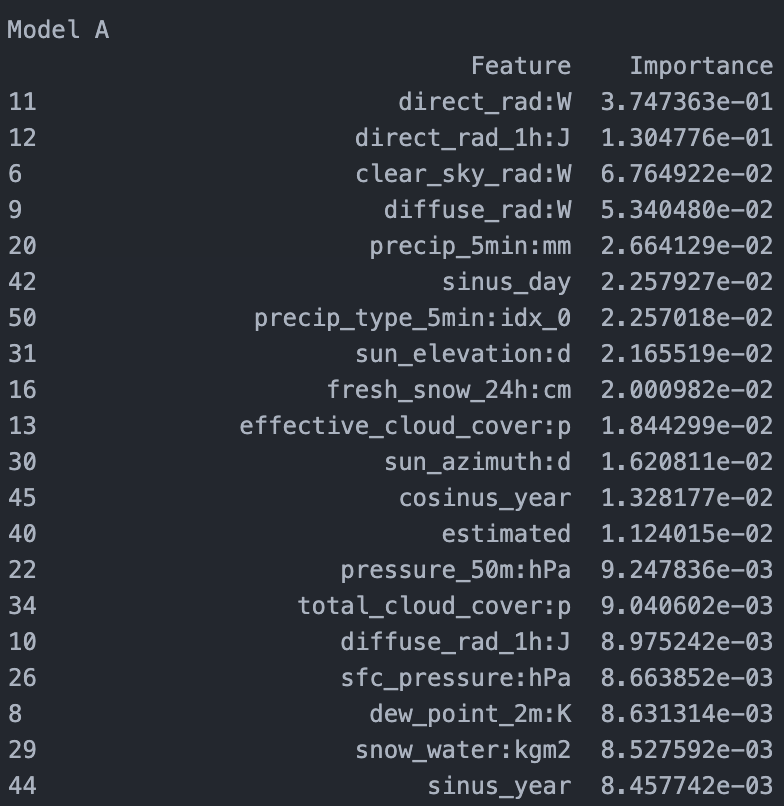

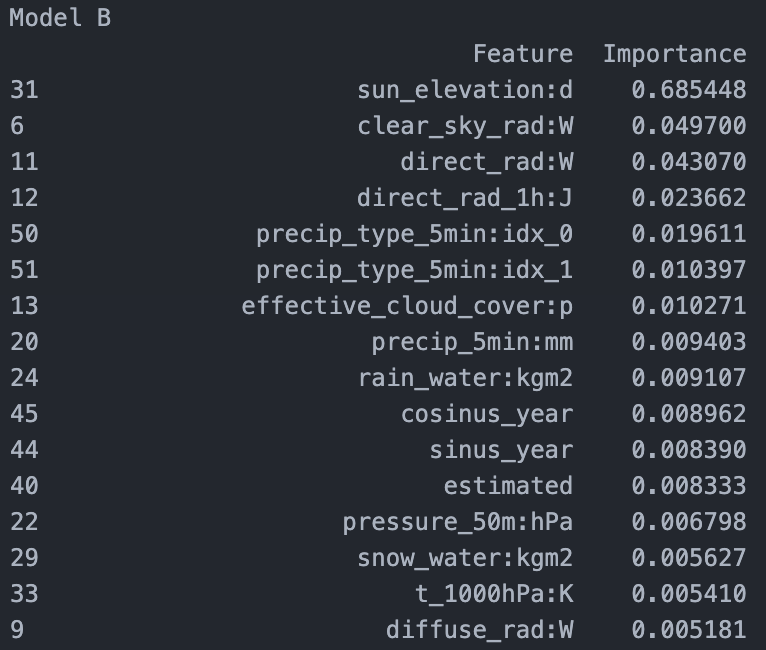

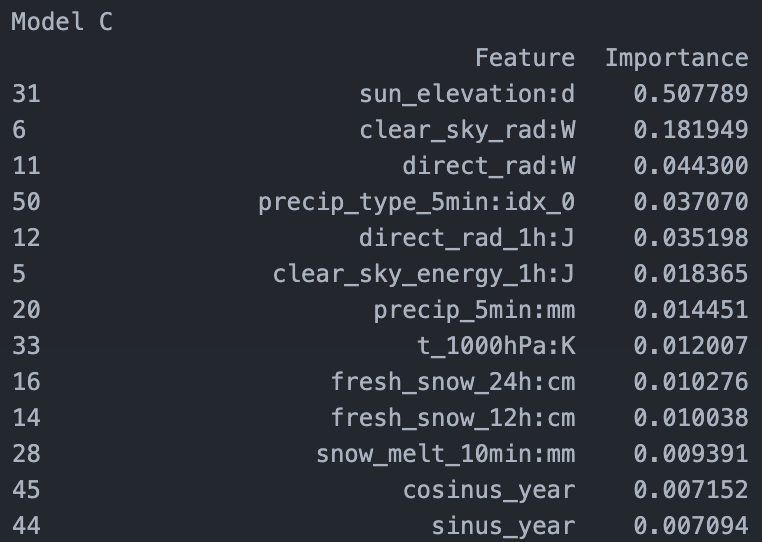

We observed that the there were many similarities in the feature importance for dataset B and C. For these we see that `sun_elevation:d` was very important, which makes sense. We also observe that radiation columns are very important for all locations, and thought of ways we could create new features using the radiation columns. We introduced some new feature engineering when using catboost regarding these features.

When experimenting with XGBoost we also tried combining all the datasets and only training one model. For this to be a possibility we added a new column `location` that told the model if the data was for location A, B or C.  

In [ ]:
import pandas as pd

def combine_all_frames(frames: [pd.DataFrame]):
    
    for i, frame in enumerate(frames):
        if i == 0:
            frame['location'] = '0'
        elif i == 1:
            frame['location'] = '1'
        elif i == 2:
            frame['location'] = '2'
    combined = pd.concat(frames)
    combined = combined.reset_index(drop=True)
    combined['location'] = combined['location'].astype('float64')

    return combined


This did not work very well for us, and we thought it could be because dataset A was very different from B and C. Therefore, we also tested combining only dataset B and C, and training two models (one for A and one for B and C). Although this was better than using all the datasets for one model, it was still not better than training one model for each location.

In [ ]:
# Combine datasets B and C

def combine_b_and_c(frames: [pd.DataFrame]):
    
    for i, frame in enumerate(frames):
        if i == 0:
            frame['location'] = '0'
        elif i == 1:
            frame['location'] = '1'
    combined = pd.concat(frames)
    combined = combined.reset_index(drop=True)
    combined['location'] = combined['location'].astype('float64')

    return combined

X_train_bc = combine_b_and_c([X_train[1], X_train[2]])
X_train_bc = one_hot_encode(X_train_bc, ["location"])

X_frames_test_bc = combine_b_and_c([X_frames_test[1], X_frames_test[2]])
X_frames_test_bc = one_hot_encode(X_frames_test_bc, ["location"])
Y_train_bc = pd.concat([Y_train[1], Y_train[2]], ignore_index=True)

After experimenting with this, we went back to focusing on training three different models, one for each location.

## Catboost

As mentioned above, we wanted to implement some new features using the features we saw were important. We found out that combining the radiation columns with the same unit of measurement helped a lot.

introduser date_forecast kolonner og kombinasjon av kolonner (mean av de forskjellige)

skriv om parameter optimalisering for cat (optuna)

In [ ]:

def combine_features(df, listOfFeaturesToCombine):
    for features in listOfFeaturesToCombine:
        new_col_name = features[0] + '_mean'
        df[new_col_name] = df[features].mean(axis=1)
    return df

listOfFeaturesToCombine = [['msl_pressure:hPa', 'pressure_100m:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa'],
                            ["diffuse_rad:W", "direct_rad:W"], 
                           ["diffuse_rad_1h:J", "direct_rad_1h:J"],
                           ['effective_cloud_cover:p', 'total_cloud_cover:p']
                    ]
for i in range(len(X_train)):
    X_train[i] = combine_features(X_train[i], listOfFeaturesToCombine)
    X_frames_test[i] = combine_features(X_frames_test[i], listOfFeaturesToCombine)

We also implemented hyperparameter optimalization with optuna for catboost

In [ ]:
import optuna
import catboost as cat # Change to model to optimize
# Split the data into training and validation sets

# Split the data into training and validation sets

x_train_a, x_val_a, y_train_a, y_val_a = train_test_split(X_train[0], Y_train[0], test_size=0.17, random_state=42)
x_train_b, x_val_b, y_train_b, y_val_b = train_test_split(X_train[1], Y_train[1], test_size=0.17, random_state=42)
x_train_c, x_val_c, y_train_c, y_val_c = train_test_split(X_train[2], Y_train[2], test_size=0.17, random_state=42)


categorical_column = ['dew_or_rime:idx_-1',	'dew_or_rime:idx_0','dew_or_rime:idx_1', 'precip_type_5min:idx_0','precip_type_5min:idx_1','precip_type_5min:idx_2','precip_type_5min:idx_3','precip_type_5min:idx_5', 'is_day:idx', 'is_in_shadow:idx']

def objective(trial):
    
    params = {
        "iterations": 1000,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
        "cat_features": categorical_column,
        "random_seed": 42,
        "loss_function": "MAE",
        "eval_metric": "MAE",
    }

    model = cat.CatBoostRegressor(**params) # Change to model to optimize
    model.fit(x_train_c, y_train_c)

    # Make predictions on the validation set
    y_pred = model.predict(x_val_c)

    # Calculate the Mean Squared Error (MSE) as the metric to optimize
    mae = mean_absolute_error(y_val_c, y_pred)

    return mae

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

best = study.best_params
# Print the best hyperparameters found
print("Best hyperparameters:", best)

This resulted in the following parameters which we used for training our model:

In [ ]:
# Use params from hyperparameter tuning using optuna
params_a = {'random_state': 42, 'learning_rate': 0.039975576144155645, 'depth': 9, 'subsample': 0.4504678933801176, 'colsample_bylevel': 0.9773225861097778, 'min_data_in_leaf': 90}
params_b = {'random_state': 42, 'learning_rate': 0.023765834908014156, 'depth': 10, 'subsample': 0.8298593330195755, 'colsample_bylevel': 0.6060393047650714, 'min_data_in_leaf': 61}
params_c = {'random_state': 42, 'learning_rate': 0.060183973978509046, 'depth': 10, 'subsample': 0.28819995411353627, 'colsample_bylevel': 0.39818319507473743, 'min_data_in_leaf': 77}

Another type of feature engineering we implemented when testing out catboost was extracting more information from the `date_forecast` column. We extracted information like hours, month, day of year and created new column with this information:

In [ ]:
import pandas as pd
import numpy as np

def date_forecast_columns(df: pd.DataFrame):

  date_forecast = df['date_forecast']
  
  df['year'] = date_forecast.dt.year
  df['month'] = date_forecast.dt.month
  df['day'] = date_forecast.dt.day
  df['hours'] = date_forecast.dt.hour
  df['day_of_week'] = date_forecast.dt.dayofweek
  df['day_of_year'] = date_forecast.dt.dayofyear
  df['week_of_year'] = date_forecast.dt.isocalendar().week

  return df

for i in range(len(X_train)):
    X_train[i] = append_seasonal_columns(X_train[i])
    X_train[i] = date_forecast_columns(X_train[i])

for i in range(len(X_frames_test)):
    X_frames_test[i] = append_seasonal_columns(X_frames_test[i])
    X_frames_test[i] = date_forecast_columns(X_frames_test[i])    
 

We could then train our model with the optimized parameters and the newly added feature engineering.

In [ ]:
# Split the data into training and validation sets

x_train_a, x_val_a, y_train_a, y_val_a = train_test_split(X_train[0], Y_train[0], test_size=0.17, random_state=42)
x_train_b, x_val_b, y_train_b, y_val_b = train_test_split(X_train[1], Y_train[1], test_size=0.17, random_state=42)
x_train_c, x_val_c, y_train_c, y_val_c = train_test_split(X_train[2], Y_train[2], test_size=0.17, random_state=42)

model_a = CatBoostRegressor(**params_a)
model_b = CatBoostRegressor(**params_b)
model_c = CatBoostRegressor(**params_c)


model_a.fit(x_train_a, y_train_a)
model_b.fit(x_train_b, y_train_b)
model_c.fit(x_train_c, y_train_c)

We used the same type of validation method as before using train_test_split, and observed that Catboost worked very well with our data. We then trained the model on the whole dataset after validating with the train_test_split:

In [ ]:
# Train the model on the entire training data
model_a.fit(X_train[0], Y_train[0])
model_b.fit(X_train[1], Y_train[1])
model_c.fit(X_train[2], Y_train[2])

y_pred_a = model_a.predict(X_frames_test[0])
y_pred_b = model_b.predict(X_frames_test[1])
y_pred_c = model_c.predict(X_frames_test[2])
print(len(y_pred_a))

y_pred = np.concatenate((y_pred_a, y_pred_b, y_pred_c), axis=0)

### Model interpretation

We plotted the feature importance for Catboost as well, and observed that our new features that were the mean of the radiation columns became very important. This helped us greatly increase the score for Catboost on Kaggle, however when we tested the feature engineering on other models like XGBoost, it did not help the model in the same way.

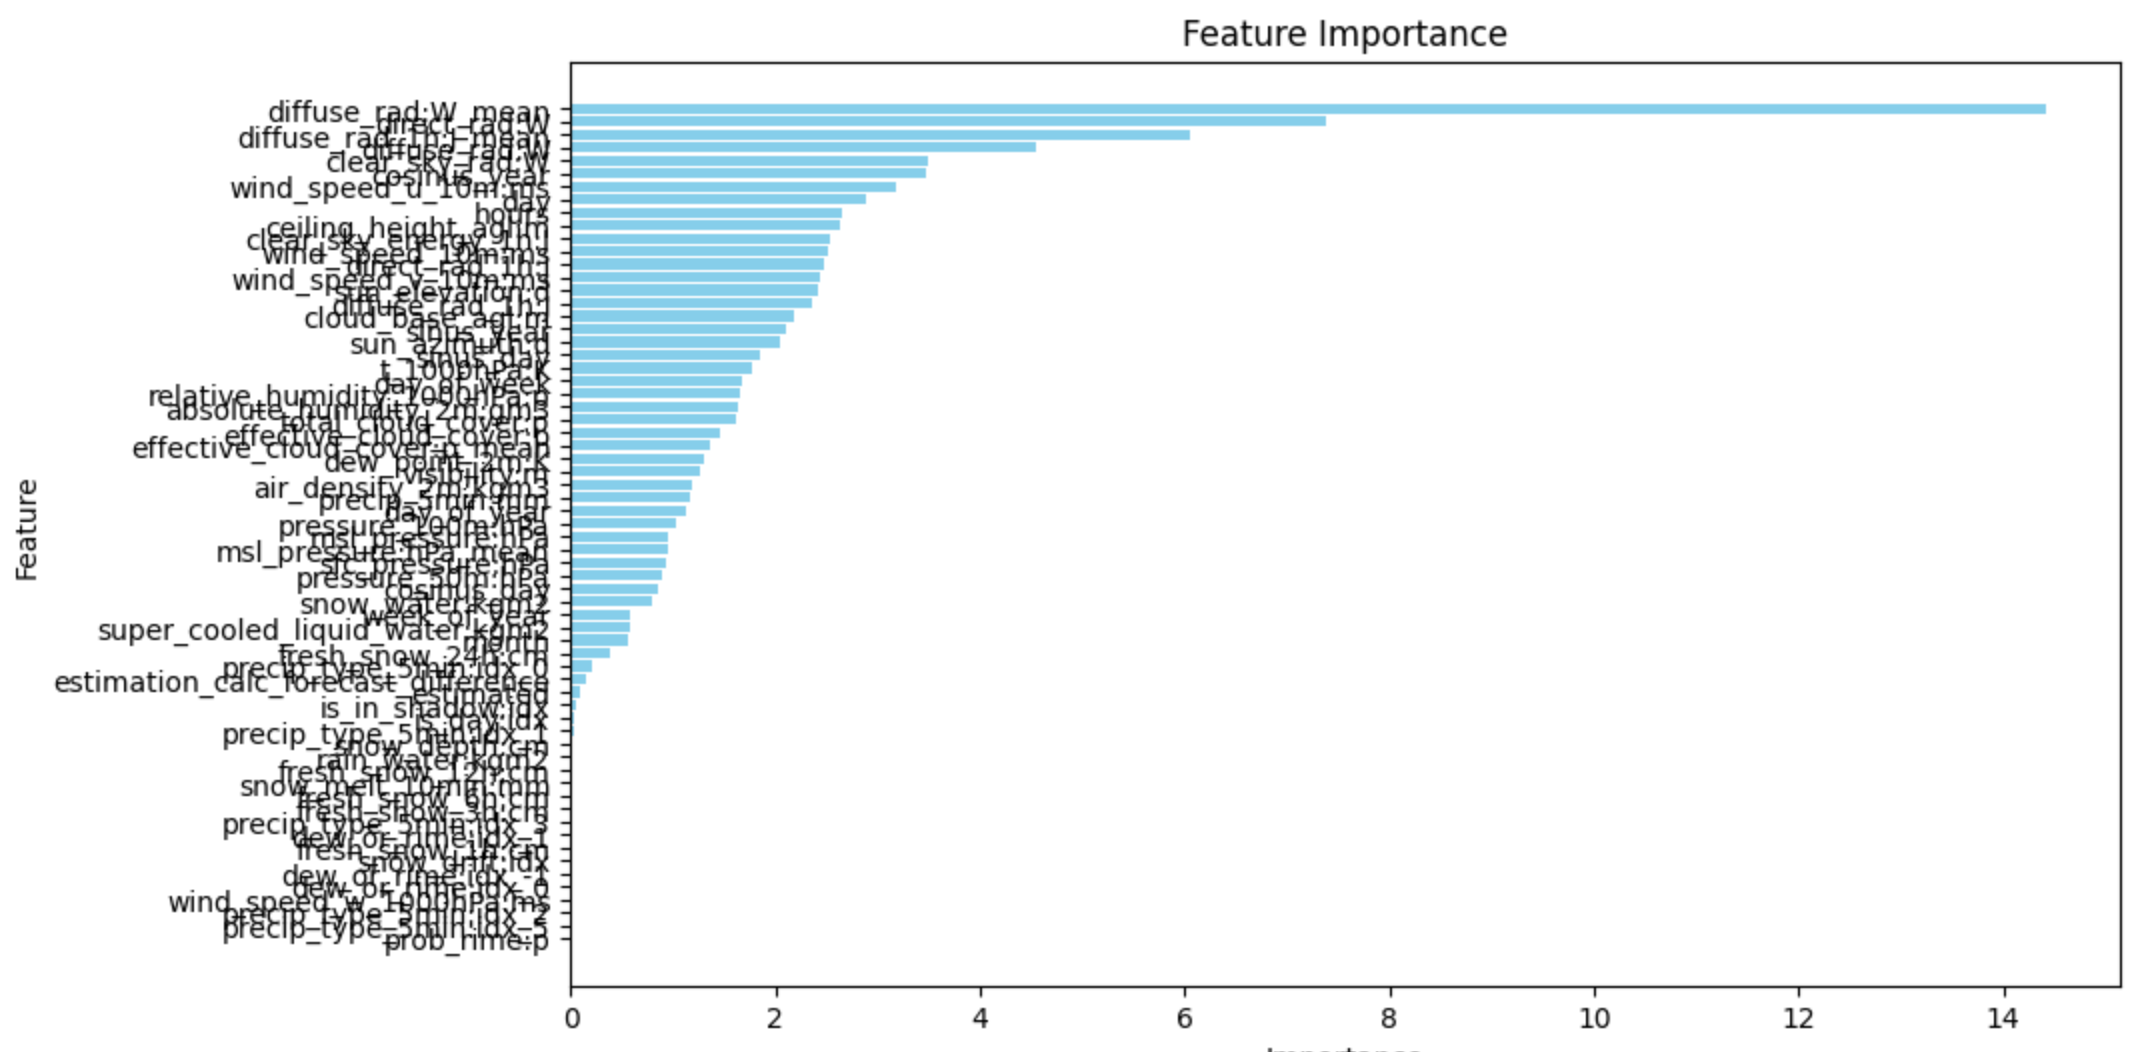

## LightGBM

We also tested LightGBM with the same aggregation and feature enineering that we have mentioned from all the models above, but as the score was not even close the Catboost, we decided to not focus further on this model.

In [ ]:
import lightgbm as lgb

# Convert the data to NumPy arrays or Pandas DataFrames
x_train_np_a = X_train[0].to_numpy()
y_train_np_a = Y_train[0].to_numpy()

x_train_np_b = X_train[1].to_numpy()
y_train_np_b = Y_train[1].to_numpy()

x_train_np_c = X_train[2].to_numpy()
y_train_np_c = Y_train[2].to_numpy()

# Split the data into training and validation sets

x_train_a, x_val_a, y_train_a, y_val_a = train_test_split(x_train_np_a, y_train_np_a, test_size=0.17, random_state=42)
x_train_b, x_val_b, y_train_b, y_val_b = train_test_split(x_train_np_b, y_train_np_b, test_size=0.17, random_state=42)
x_train_c, x_val_c, y_train_c, y_val_c = train_test_split(x_train_np_c, y_train_np_c, test_size=0.17, random_state=42)

train_data_a = lgb.Dataset(x_train_a, label=y_train_a)
val_data_a = lgb.Dataset(x_val_a, label=y_val_a, reference=train_data_a)


train_data_b = lgb.Dataset(x_train_b, label=y_train_b)
val_data_b = lgb.Dataset(x_val_b, label=y_val_b, reference=train_data_b)

train_data_c = lgb.Dataset(x_train_c, label=y_train_c)
val_data_c = lgb.Dataset(x_val_c, label=y_val_c, reference=train_data_b)

num_round = 10000  # You can adjust the number of boosting rounds

model_a = lgb.train(params_a, train_data_a, num_round, valid_sets=[val_data_a])
model_b = lgb.train(params_b, train_data_b, num_round, valid_sets=[val_data_b])
model_c = lgb.train(params_c, train_data_c, num_round, valid_sets=[val_data_c])

## Tensorflow

skriv litt om tensorflow og hva som måtte modifiseres for at denne skulle funke

introduser at vi setter cloud base og ceiling hegiht til 20000 (kanskje fordi tensorflow må dette??)

skriv at vi teste med å droppe features


introduser at vi cleaner y dataen konstante verdier.

## AutoKeras

introduser det med vi dropper noen punkter i x som ødelegger aggregering


## Combining models

An important method which helped us achieve our best scores, was combining different models. We did this by using the mean of different submissions.

In [ ]:
"""
    This notebook is used to calculate the mean of two submissions.
    The function takes in two names of the submission files and creates a new submission file with the mean of the two.
"""
import pandas as pd

path = "../model_notebooks/submissions/"
def prediction_above10(submission: pd.DataFrame):
    submission.loc[submission['prediction'] < 10, 'prediction'] = 0
    return submission


def mean_of_two_submissions(submission1, submission2, new_submission):
    submission1 = pd.read_csv(path + submission1)
    submission2 = pd.read_csv(path + submission2)


    submission1['prediction'] = (submission1['prediction'] + submission2['prediction'])/2
    submission1 = prediction_above10(submission1)
    submission1.to_csv(new_submission, index=False)

mean_of_two_submissions("submission_cat.csv", "submission_ak.csv", path +"submission_cat_ak.csv")



## Pycaret

We also tried using Pycaret. This is a machine learning library in Python that can help automate workflows. Pycaret was used to try setup different models and combine them into one. However, long runtime and bad kaggle score resulted in no further focus after the first attempt. The combination of models were Random Forrest, LightGBM and XGBoost.

In [ ]:
# Random Forest setup

def setup_experiment_rf(X_train, Y_train):

    X_train['target'] = Y_train

    exp_reg = setup(data = X_train, target = 'target', session_id = 123, 
                    categorical_features=['dew_or_rime:idx', 'precip_type_5min:idx', 'is_day:idx', 'is_in_shadow:idx'], 
                    html=False, experiment_name='rf_experiment')
    
    random_forest = create_model('rf')
    # Tune model
    tuned_rf = tune_model(random_forest, optimize = 'MAE')

    # Create boosted model
    boosting_rf = ensemble_model(tuned_rf, method='Boosting')

    final_model = finalize_model(boosting_rf)

    return final_model

In [ ]:
# LightGBM setup

def setup_experiment_lightgbm(X_train, Y_train):

    X_train['target'] = Y_train

    exp_reg = setup(data = X_train, target = 'target', session_id = 123, 
                    categorical_features=['dew_or_rime:idx', 'precip_type_5min:idx', 'is_day:idx', 'is_in_shadow:idx'], 
                    html=False, experiment_name='lightgbm_experiment')
    
    lightgbm = create_model('lightgbm')
    # Tune model
    tuned_lightgbm = tune_model(lightgbm, optimize = 'MAE')

    # Create bagged model
    bagged_lightgbm = ensemble_model(tuned_lightgbm, method='Bagging')

    final_model = finalize_model(bagged_lightgbm)

    return final_model

In [ ]:
# Xgboost setup

def setup_experiment_xgboost(X_train, Y_train):

    X_train['target'] = Y_train

    exp_reg = setup(data = X_train, target = 'target', session_id = 123, 
                    categorical_features=['dew_or_rime:idx', 'precip_type_5min:idx', 'is_day:idx', 'is_in_shadow:idx'], 
                    html=False, experiment_name='xgboost_experiment')
    
    xgboost = create_model('xgboost')
    
    # Tune model
    tuned_xgb = tune_model(xgboost, optimize = 'MAE')

    # Create bagged model
    bagged_xgb = ensemble_model(tuned_xgb, method='Bagging')

    final_model = finalize_model(bagged_xgb)

    return final_model

In [ ]:

from sklearn.linear_model import LinearRegression

all_preds_lgbm = []
all_preds_rf = []
all_preds_xgb = []

for i in range(len(X_train)):

  # Filter data for months March, April, May, June, July, August, September
  # X_train[i] = X_train[i][X_train[i]['date_forecast'].dt.month.isin([3,4,5,6,7,8,9])]
  # Setup models
  final_model_lgbm = setup_experiment_lightgbm(X_train[i], Y_train[i])
  final_model_rf = setup_experiment_rf(X_train[i], Y_train[i])
  final_model_xgb = setup_experiment_xgboost(X_train[i], Y_train[i])

  # Predictions
  preds_lgbm = predict_model(final_model_lgbm, data=X_frames_test[i])
  preds_rf = predict_model(final_model_rf, data=X_frames_test[i])
  preds_xgb = predict_model(final_model_xgb, data=X_frames_test[i])
  final_preds_lgbm = preds_lgbm['prediction_label']
  final_preds_rf = preds_rf['prediction_label']
  final_preds_xgb = preds_xgb['prediction_label']

  # Append predictions to list
  all_preds_lgbm.append(final_preds_lgbm)
  all_preds_rf.append(final_preds_rf)
  all_preds_xgb.append(final_preds_xgb)

In [ ]:
all_preds_lgbm = np.array(all_preds_lgbm).flatten()
all_preds_rf = np.array(all_preds_rf).flatten()
all_preds_xgb = np.array(all_preds_xgb).flatten()

y_pred = (all_preds_lgbm + all_preds_rf + all_preds_xgb)/3

for i in range(len(y_pred)):
    if y_pred[i] < 0: 
        y_pred[i] = 0
print(len(y_pred))

## Feature engineering updates

siste endringer

flip funksjonen?

X_train[i]['above_300_kelvin'] = np.where(X_train[i]['t_1000hPa:K'] > 298, 1, 0) 

dette?

for i in range(len(X_train)):
    A = X_train[i]['sun_elevation:d'].apply(sinus_degrees)
    B = X_train[i]['air_density_2m:kgm3']
    AT = X_frames_test[i]['sun_elevation:d'].apply(sinus_degrees)
    BT = X_frames_test[i]['air_density_2m:kgm3']

    X_train[i]['COMB_sun_elevation_air_density'] = multiply_columns(A, B)
    X_frames_test[i]['COMB_sun_elevation_air_density'] =  multiply_columns(AT, BT)
    X_train[i].drop(columns=['air_density_2m:kgm3'], inplace=True)
    X_frames_test[i].drop(columns=['air_density_2m:kgm3'], inplace=True)


andre feature engineering vi har i beste notebook som ikke nevnt


## AutoGluon


hvordan den settes opp, quality osv.

nye feature engineering vi tok med her
